# Question 1
## (a) Analyse the given data, and provide two (2) charts and corresponding summarised tables, using MS Excel. Describe the insights obtained from this analysis. 

### Histogram of satisfaction score:


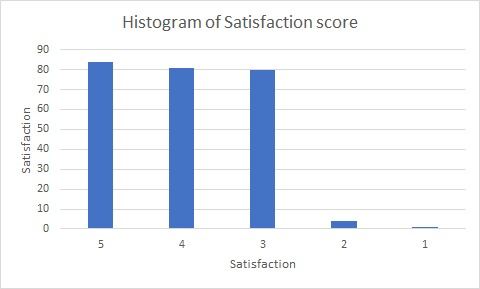

### Histogram of absence:

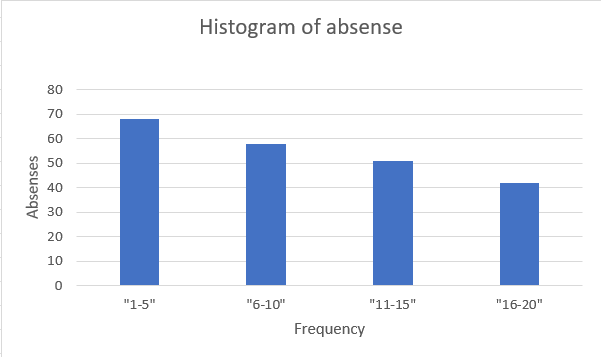

## (b) Read the data and create the same two (2) charts and their corresponding summarised tables produced in Part (a), using Python.

In [12]:
!pip install openpyxl pandas matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import openpyxl
dframe = pd.read_excel('TMA_Data.xlsx',dtype={'JoinDate':'datetime64','LeftDate':'datetime64'})
#fill NaN to date
dframe['LeftDate'] = dframe['LeftDate'].fillna('2022-05-01')
dframe.head()


Defaulting to user installation because normal site-packages is not writeable


,ID,Staff,BirthYear,Gender,Marital,Citizenship,Minority,JoinDate,LeftDate,Unit,Salary,PerformanceScore,Survey,Satisfaction,Absence
0,1,Aairah Hastings,1986-07-10 00:00:00,F,Single,Citizen,Yes,2012-02-04,2022-05-01,Manufacturing,46335,Meet,3.4,5,15
1,2,Aaminah Mcmillan,05/25/86,F,Married,Citizen,No,2014-12-05,2022-05-01,Manufacturing,66825,Meet,4.6,3,20
2,3,Aamna Howell,04/20/85,F,Single,Citizen,No,2014-09-29,2022-05-01,Manufacturing,60446,Meet,3.4,4,14
3,4,Aayan Ferrell,1984-10-06 00:00:00,M,Married,Citizen,No,2016-05-01,2022-05-01,Admin,93046,Meet,4.1,4,20
4,5,Ace Potter,1989-08-09 00:00:00,F,Divorced,Citizen,No,2011-11-07,2020-06-09,Manufacturing,50825,Meet,5.0,4,2


### Histogram of satisfaction score:

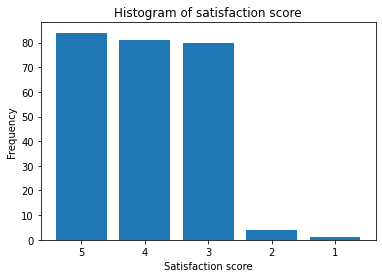

In [13]:
data = {'1':0,'2':0,'3':0,'4':0,'5':0}

for i in range(len(dframe)):
    data[str(dframe["Satisfaction"][i])] = 1 + data[str(dframe["Satisfaction"][i])]

data3 = sorted(list(data.keys()),reverse=True)
labels = sorted(list(data.values()),reverse=True)
plt.xticks(range(len(labels)), data3)
#  top label be 'Histogram of satisfaction score', left be 'Frequency', bottom be 'Satisfaction score'
plt.xlabel('Satisfaction score')
plt.ylabel('Frequency')
plt.title('Histogram of satisfaction score')
plt.bar(data3, labels) 
plt.show()

## Histogram of absence:

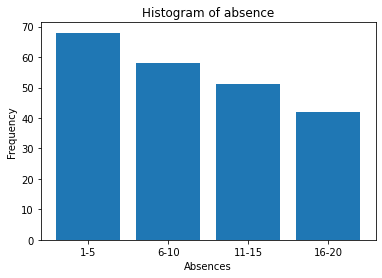

{'1-5': 68, '6-10': 58, '11-15': 51, '16-20': 42}

In [14]:
absent_stats = {'1-5':0,'6-10':0,'11-15':0,'16-20':0}
for j in dframe["Absence"]:
    if j <= 5:
        absent_stats['1-5'] = absent_stats['1-5'] + 1
    elif ((j > 5) and (j <= 10)):
        absent_stats['6-10'] = absent_stats['6-10'] + 1
    elif ((j > 11) and (j <= 15)):
        absent_stats['11-15'] = absent_stats['11-15'] + 1
    elif ((j > 16) and (j <= 20)):
        absent_stats['16-20'] = absent_stats['16-20'] + 1
        

data4 = list(absent_stats.keys())
labels1 = list(absent_stats.values())
plt.xticks(range(len(labels1)), data4)
#  top label be 'Histogram of satisfaction score', left be 'Frequency', bottom be 'Satisfaction score'
# Chart 2: number of absences (how many people took 1-5 days, how many took 6-10, 11-15, 16-20, etc)
# similar labels for the other chart too. Top label 'Histogram of absence', left be 'Frequency', bottom be 'Absences'
plt.xlabel('Absences')
plt.ylabel('Frequency')
plt.title('Histogram of absence')
plt.bar(data4, labels1) 
plt.show()
absent_stats


## (c) Find the length of service of all the staff, using Python. For staff who has not left the organization, use 1st May 2022 as the LeftDate. State the minimum, maximum and average length of service, expressing in years, rounded to 1 decimal place. (1 year is taken as 365 days.)

In [15]:
from datetime import datetime

duration_list =[]
for i in range(len(dframe)):
    str_dt1 =str(dframe["JoinDate"][i])
    str_dt2 =str(dframe["LeftDate"][i])
    try:
        # convert string to datetime
        
        dt1 = datetime.strptime(str_dt1, "%Y-%m-%d")
        dt2 = datetime.strptime(str_dt2, "%Y-%m-%d")
        delta = dt2 - dt1
        total_service = float(delta.days/365)
        duration_list.append(total_service)
    except:
        # convert string to datetime
        try:
            dt1 = datetime.strptime(str_dt1, "%Y-%m-%d %H:%M:%S")
            dt2 = datetime.strptime(str_dt2, "%Y-%m-%d %H:%M:%S")
            delta = dt2 - dt1
            total_service = float(delta.days/365)
            duration_list.append(total_service)
        except:
            duration_list.append(0)

data_service = {'Staff': dframe['Staff'],'length of service': duration_list}
df3 = pd.DataFrame(data_service,columns=['Staff','length of service'])
print(df3)
print(df3.describe())

                Staff  length of service
0     Aairah Hastings          10.243836
1    Aaminah Mcmillan           7.408219
2        Aamna Howell           7.591781
3       Aayan Ferrell           6.002740
4          Ace Potter           8.594521
..                ...                ...
245     Zaina Parrish           7.208219
246       Zane Downes           5.032877
247       Zayd Farley           8.005479
248       Zoya Easton           2.408219
249    Zuzanna Pruitt           7.093151

[250 rows x 2 columns]
       length of service
count         250.000000
mean            6.768438
std             3.157933
min             0.071233
25%             4.640411
50%             7.279452
75%             8.736986
max            15.673973


## (d) Develop an interactive user input which allows the user to query if a particular person was/is a staff of the organization. One can assume the full name is entered by the user. The output should print the answer to the user’s question if that person can be found in the organization’s records. The interactive user input should also allow the user to continue to make another query, till the user chooses otherwise. 

In [ ]:
while(True):
    #get input from user
    staff_name = str(input("Enter the name of the staff: "))
    #get row by staff name
    staff_row = dframe[dframe['Staff'] == staff_name]
    print(staff_row)
    # print(staff_name)
    # dframe.loc[dframe['Staff'] == staff_name]

Enter the name of the staff: Aayan Ferrell
   ID          Staff            BirthYear Gender  Marital Citizenship  \
3   4  Aayan Ferrell  1984-10-06 00:00:00     M   Married     Citizen   

  Minority   JoinDate   LeftDate    Unit  Salary PerformanceScore  Survey  \
3       No 2016-05-01 2022-05-01  Admin    93046             Meet     4.1   

   Satisfaction  Absence  
3             4       20  
